
## **<h3 align="center"> Text Mining - Project </h3>**
# **<h3 align="center"> Sentiment Analysis</h3>**
**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

# Introduction
In this notebook we will adress and explore one of the most relevant and interesting subjects of Text Mining: Sentiment Analysis.
We aim to analyse the sentiment of the lyrics of each genre in our dataset. To accomplish this we will try some Natural Language Processing (NLP) and then use several visualizations in order to answer to the following questions:

1 - What are the predominant sentiments in the lyrics of the songs of a specific musical genre? <br>
2 - Are there changes in the predominant sentiments of a genre over the years? <br>
3 - Does a song's sentiment impact its popularity within a genre (or even across genres)? <br>
4 - Does the inclusion of featuring relate to any sentiment? Are songs with a more negative tone more likely to include featuring? <br>
5 - Is there a correlation between the complexity of lyrics (measured by vocabulary richness) and the expressed sentiment? Do more complex lyrics tend to convey more nuanced sentiments?


## Table of Contents
* [1. Import packages and data](#chapter1)
* [2. Sentiment Analysis of Lyrics](#chapter2)
    * [2.1. Vader](#section_2_1)
        * [2.1.1 Applying VADER](#sub_section_2_1_1)
        * [2.1.2. VADER Visualization](#sub_section_2_1_2)
    * [2.2. TextBlob](#section_2_2)
        * [2.2.1 Applying TextBlob](#sub_section_2_2_1)
        * [2.2.2. TextBlob Visualization](#sub_section_2_2_2)
    * [2.3. Comparing  Results](#section_2_3)
        * [2.3.1. Boxplots](#sub_section_2_3_1)
        * [2.3.2. Wordclouds](#sub_section_2_3_2)
* [3. Extracting Insights](#chapter3)
    * [3.1. Predominant Sentiments in Lyrics per Genre](#section_3_1)
    * [3.2. Sentiment Changes Over the Years ](#section_3_2)
    * [3.3. Sentiment and Songs' Popularity](#section_3_3)
    * [3.4. Featuring and Sentiment](#section_3_4)
    * [3.5. Lyrics' Complexity and Sentiment](#section_3_5)

# 1. Import packages and data <a class="anchor" id="chapter1"></a>
---
In the following cell, we will import the needed packages for Sentiment Analysis notebook.

In [1]:
#pandas and numpy for df manipulation
import pandas as pd
import numpy as np
import nltk
import random

#Sentiment Analysis with VADER
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Sentiment Analysis with TextBlob
# !pip install textblob
from textblob import TextBlob

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Not letting the warnings appear
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In our case, since the pre processing was already done in notebook 1, we only need to upload the data for sentiment analysis.

In [2]:
songs = pd.read_csv('songs_sa.csv')

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134789 entries, 0 to 134788
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    134789 non-null  int64 
 1   title                 134787 non-null  object
 2   tag                   134789 non-null  object
 3   artist                134789 non-null  object
 4   year                  134789 non-null  int64 
 5   views                 134789 non-null  int64 
 6   features              134789 non-null  object
 7   lyrics                134789 non-null  object
 8   Lyrics_Length         134789 non-null  int64 
 9   Has_regex             134789 non-null  int64 
 10  lyrics_without_regex  134789 non-null  object
 11  featuring             134789 non-null  int64 
 12  preproc_content       134789 non-null  object
dtypes: int64(6), object(7)
memory usage: 13.4+ MB


# 2. Sentiment Analysis of Lyrics <a class="anchor" id="chapter2"></a>
-------------------------

In this topic, we'll employ two distinct algorithms, VADER and TextBlob, to conduct sentiment analysis on preprocessed lyrics (_preproc_content_). Following this sentiment analysis, we will proceed to compare and contrast the results obtained from each algorithm across different music genres, using the 'tag' as a reference. This comparative study will shed light on the differences and nuances in sentiment analysis outcomes generated by Vader and TextBlob within various music genres.

## 2.1. VADER <a class="anchor" id="section_2_1"></a>

**VADER (Valence Aware Dictionary and sEntiment Reasoner)**<br>
>VADER is a lexicon and rule-based sentiment analysis tool. It uses a predefined set of rules and a sentiment lexicon that contains sentiment scores for words. It evaluates text sentiment by analyzing the words in a sentence and assigning sentiment scores (positive, negative, neutral) to each word. It considers word order, punctuation, capitalization, and even emojis to assess the sentiment of a sentence. It is commonly used for quick sentiment analysis tasks, especially in social media or short informal text contexts.


### 2.1.1. Applying VADER  <a class="anchor" id="sub_section_2_1_1"></a>

In the following cell, we will use a random row, to see exactly what is the output of Vader, and to better analyse what are the insigths that we migth have using this approach:

In [4]:
# Create an instance of the SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

# Sample a random row from the 'songs' DataFrame
random_row = songs.sample(n=1)

# Extract the preprocessed content from the random row - running the cell multiple times will change the row that appears
random_sentence = random_row['preproc_content'].iloc[0]

# Use the VADER sentiment analyzer to calculate sentiment scores for the random sentence
sentiment_scores = vader.polarity_scores(random_sentence)

# Print the sentiment scores
print(random_sentence)
print(sentiment_scores)

Sleepwalk with me Can you see what see? keep my red giraffe afloat in the Caspian Sea When he eats porridge it clings to his facial hair Pendulating in the warm air Climb on my back Ill swim out so you can improve your view of his beard Discover first hand why its so revered Block out the light And we ll sleepwalk tonight Is it real or counterfeit? Truth or a skit? Here lies My abundance of gold It quite Splendorous to behold ve been told There more than necessary bestow it instantly But they disagree And they won let me Give generously Don get too close The goblins protect my wealth and kill all who succumb They ll snatch your skin to craft more bongo drums Block out the light And we ll sleepwalk tonight Is it real or counterfeit? Truth or a skit? Your safety not guaranteed As the stars shine bright Venture to the arcane Tonight We ll refrain from the mundane
{'neg': 0.098, 'neu': 0.707, 'pos': 0.195, 'compound': 0.9581}


- The _neg_ is the negative score. <br>
- The _neu_ is the neutral score. <br>
- The _pos_ is the positive score. <br>

The compound score will typically fall within the range [-1,1], where: <br>
• A compound score greater than 0 indicates a **positive** sentiment. <br>
• A compound score less than 0 indicates a **negative** sentiment.<br>
• A compound score of 0 indicates a **neutral** sentiment.

Now we will create a function to calculatte the sentiment scores, for exploring reasons we will store, not only the compound score, but also the negative, neutral and positive score.

In [5]:
# Define a function to calculate all sentiment scores
def get_sentiment_scores(text):
    sentiment_scores = vader.polarity_scores(text)
    return {
        'compound': sentiment_scores['compound'],
        'negative': sentiment_scores['neg'],
        'neutral': sentiment_scores['neu'],
        'positive': sentiment_scores['pos']
    }

# Create new columns for all sentiment scores
sentiment_scores = songs['preproc_content'].apply(get_sentiment_scores)
songs[['compound_score_vader', 'negative_score_vader', 'neutral_score_vader', 'positive_score_vader']] = pd.DataFrame(sentiment_scores.tolist())

In [6]:
# Calculate average scores for each sentiment category and merge them in a single step
merged_scores_vader = (songs.groupby('tag').agg({'compound_score_vader': 'mean', 
                                                 'negative_score_vader': 'mean', 
                                                 'neutral_score_vader': 'mean', 
                                                 'positive_score_vader': 'mean'})
                       .rename(columns={'compound_score_vader': 'compound_score', 
                                        'negative_score_vader': 'negative_score', 
                                        'neutral_score_vader': 'neutral_score', 
                                        'positive_score_vader': 'positive_score'}))

merged_scores_vader

,compound_score,negative_score,neutral_score,positive_score
tag,,,,
country,0.413600,0.087848,0.761238,0.150926
misc,0.296455,0.095747,0.775584,0.128672
pop,0.263679,0.102273,0.752189,0.145538
rap,-0.206184,0.147913,0.727873,0.124214
rb,0.389329,0.098645,0.738273,0.163083
rock,-0.009758,0.128745,0.746987,0.124267


>It seems that rock and rap are generally a bit more negative than the other genres, and country is the one that has a more positive sentiment to it.

### 2.1.2. VADER Visualization <a class="anchor" id="sub_section_2_1_2"></a>

Let's look at some boxplots of our results, to see the distribution of the obtained scores.

In [7]:
def plot_boxplot(x_value, x_label):
    """
    Plots a box plot for a specified numerical variable across different genres.

    Parameters:
    - x_value: The numerical variable for the x-axis.
    - x_label: The label for the x-axis.

    Returns:
    - None (displays the plot).
    """
    # Set the figure size
    plt.figure(figsize=(4, 3))

    # Create a box plot using Seaborn
    sns.boxplot(x=x_value, y='tag', data=songs, palette="BuPu_r")

    # Set the title of the plot
    plt.title(f'Box Plot of {x_label} for Each Genre')

    # Set the label for the x-axis
    plt.xlabel(x_label)

    # Set the label for the y-axis
    plt.ylabel('Genre')

    # Display the plot
    plt.show()

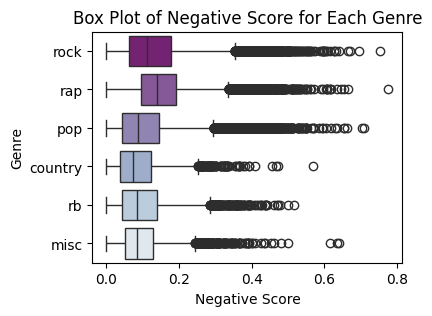

In [8]:
plot_boxplot('negative_score_vader', 'Negative Score')

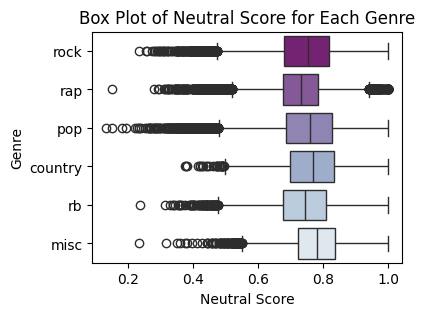

In [9]:
plot_boxplot('neutral_score_vader', 'Neutral Score')

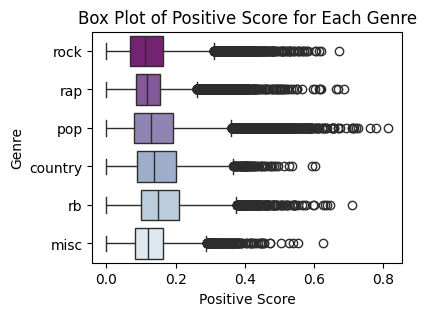

In [10]:
plot_boxplot('positive_score_vader', 'Positive Score')

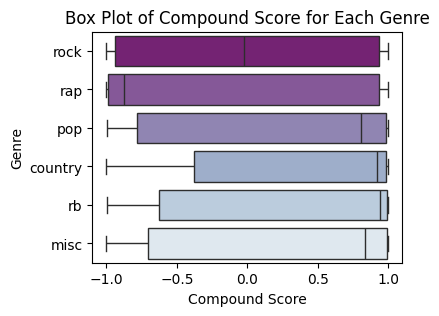

In [11]:
plot_boxplot('compound_score_vader', 'Compound Score')

>We can see that we have a high range of feelings, going from negative to neutral to positive. Country, as commented before, is a genre where there are more positive feelings present, followed by R&B. Miscelaneaous and pop are not far behind, leaving Rap and Rock as the ones that are more negative, altough we can see in the boxplot that they have positive feelings too.

## 2.2. TextBlob <a class="anchor" id="section_2_2"></a>


**TextBlob**<br>
>TextBlob uses a sentiment lexicon and machine learning techniques to assign polarity to text. It uses a pattern-based approach and a sentiment lexicon to calculate sentiment scores. It is more adequate to formal texts, such as books and papers.

Naturally, since VADER is more suited to informal language, and our lyrics have a lot of slang, we expect it to be more suitable than TextBlob. We will still test both and compare their results, mostly to confirm our assumption.

## 2.2.1. Applying TextBlob <a class="anchor" id="sub_section_2_1_1"></a>
Now, we will apply the TEXTBLOB. As we did before, we will use the random sentence to understand what are the outputs of this algorithm.

In [12]:
# Create a TextBlob object for the random sentence
test_blob = TextBlob(random_sentence)

# Use the sentiment property of the TextBlob object to get sentiment scores
# The sentiment property returns a named tuple of the form Sentiment(polarity, subjectivity)
# where polarity is a float within the range [-1.0, 1.0], and subjectivity is a float within the range [0.0, 1.0]
sentiment_scores = test_blob.sentiment

print(test_blob)
print(sentiment_scores)

Sleepwalk with me Can you see what see? keep my red giraffe afloat in the Caspian Sea When he eats porridge it clings to his facial hair Pendulating in the warm air Climb on my back Ill swim out so you can improve your view of his beard Discover first hand why its so revered Block out the light And we ll sleepwalk tonight Is it real or counterfeit? Truth or a skit? Here lies My abundance of gold It quite Splendorous to behold ve been told There more than necessary bestow it instantly But they disagree And they won let me Give generously Don get too close The goblins protect my wealth and kill all who succumb They ll snatch your skin to craft more bongo drums Block out the light And we ll sleepwalk tonight Is it real or counterfeit? Truth or a skit? Your safety not guaranteed As the stars shine bright Venture to the arcane Tonight We ll refrain from the mundane
Sentiment(polarity=0.18137254901960786, subjectivity=0.45098039215686275)


Metrics obtained:<br>
**Polarity**- in sentiment analysis represents the emotional tone of the text, measuring its positivity or negativity. <br>
**Subjectivity**- measures the extent of personal opinion, emotion, or factual information present in the text.

In [13]:
# Import necessary libraries
from textblob import TextBlob
import numpy as np
import pandas as pd

# Define a function to calculate both polarity and subjectivity
def textblob_wrapper(user_review, mean_sentence=False):
    """
    Calculate the average polarity and subjectivity using TextBlob.

    Parameters:
    - user_review: A user review or a list of sentences.
    - mean_sentence: If True, calculate the average for each sentence in the list.

    Returns:
    - A tuple containing the average polarity and subjectivity.
    """
    if type(user_review) == list:
        sent_polarity_list = []
        sent_subjectivity_list = []
        for sentence in user_review:
            blob = TextBlob(sentence)
            sent_polarity_list.append(blob.sentiment.polarity)
            sent_subjectivity_list.append(blob.sentiment.subjectivity)
        polarity = np.array(sent_polarity_list).mean()
        subjectivity = np.array(sent_subjectivity_list).mean()
    else:
        blob = TextBlob(user_review)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply the function to create new columns for polarity and subjectivity
sentiment_scores = songs['preproc_content'].apply(lambda review: textblob_wrapper(str(review)))
songs[['textblob_polarity', 'textblob_subjectivity']] = pd.DataFrame(sentiment_scores.tolist())


In [14]:
# Calculate average scores for each sentiment category and merge them in a single step
merged_scores_textblob = (
    songs.groupby('tag')
    .agg({'textblob_polarity': 'mean', 'textblob_subjectivity': 'mean'})
)

merged_scores_textblob

,textblob_polarity,textblob_subjectivity
tag,,
country,0.101888,0.484957
misc,0.089228,0.491095
pop,0.082818,0.500546
rap,0.006331,0.502773
rb,0.087554,0.509607
rock,0.035325,0.495912


>It seems that every genre is identified as mostly neutral, as all values are very close to 0.

## 2.2.2. VADER Visualization <a class="anchor" id="sub_section_2_2_2"></a>

As we did for VADER, let's look at some boxplots of our results, to see the distribution of the obtained scores.

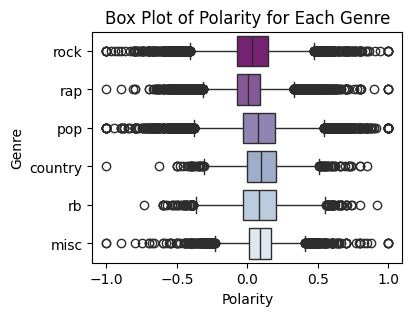

In [15]:
plot_boxplot('textblob_polarity', 'Polarity')

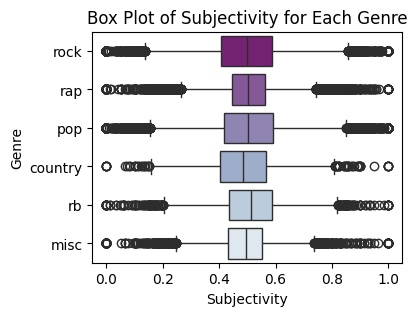

In [16]:
plot_boxplot('textblob_subjectivity', 'Subjectivity')

>We can see that it does not identify anything as negative, or positive, everything is mostly neutral, which does not really agree with what was seen on VADER.

## 2.3. Comparing Results <a class="anchor" id="section_2_3"></a>
In the following section we will, through visualization, in particulary boxplots and wordclouds, understand what is the best algorithm for Sentiment Analysis in lyrics.

### 2.3.1. Boxplots <a class="anchor" id="sub_section_2_3_1"></a>

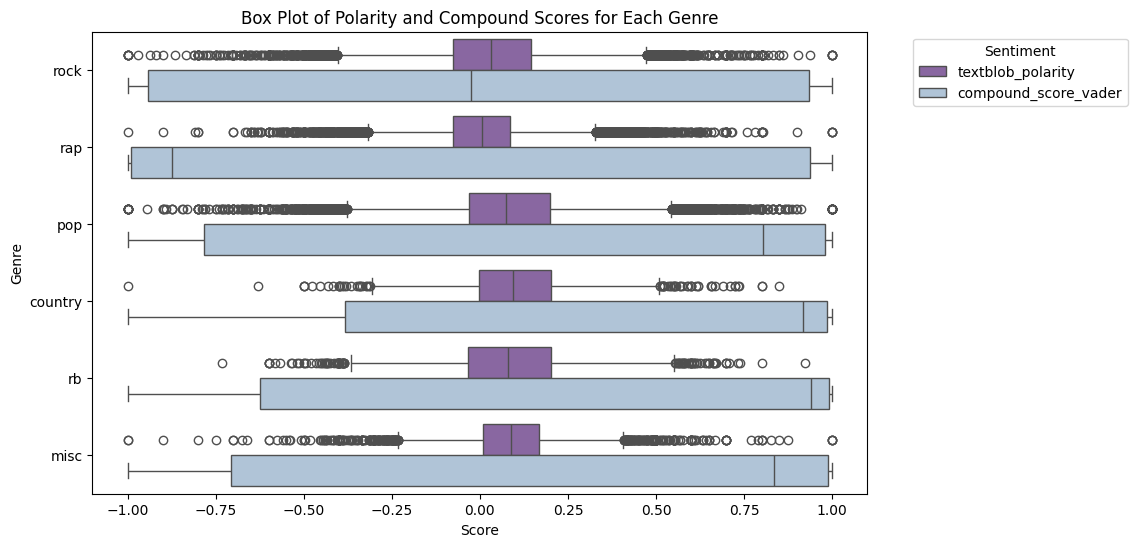

In [17]:
# Melt the DataFrame to prepare for plotting both scores in the same graph
melted_data = songs.melt(id_vars='tag', value_vars=['textblob_polarity', 'compound_score_vader'],
                         var_name='Sentiment', value_name='Score')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='tag', hue='Sentiment', data=melted_data, palette="BuPu_r")
plt.title('Box Plot of Polarity and Compound Scores for Each Genre')
plt.xlabel('Score')
plt.ylabel('Genre')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

>The results between the two methods are extremely different. While TextBlob identifies every genre as being mostly neutral, with some observations as more extreme, VADER shows a higher range of sentiment for each genre.

### 2.3.2. Wordclouds <a class="anchor" id="sub_section_2_3_2"></a>

**Wordclouds for VADER:**

In [18]:
def generate_wordcloud(sentiment_data, title):
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=None,
                          min_font_size=10).generate(sentiment_data)

    plt.figure(facecolor=None)
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

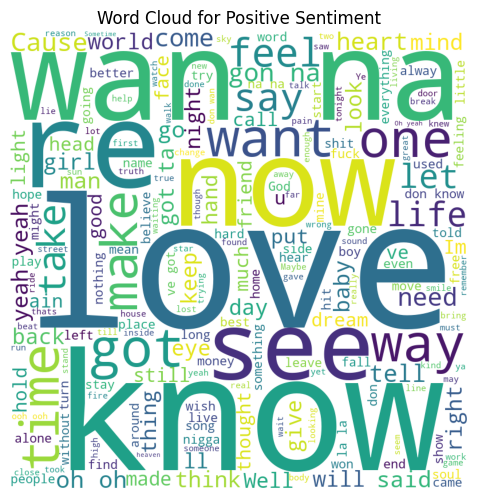

In [19]:
#Filter data for positive sentiment (compound score > 0)
positive_sentiment_vader = songs[songs['compound_score_vader'] > 0]['preproc_content'].str.cat(sep=' ')
generate_wordcloud(positive_sentiment_vader, 'Word Cloud for Positive Sentiment')

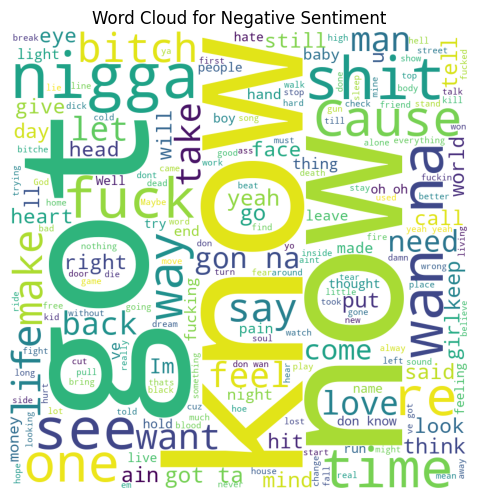

In [34]:
#Filter data for negative sentiment (compound score < 0)
negative_sentiment_vader = songs[songs['compound_score_vader'] < 0]['preproc_content'].str.cat(sep=' ')
generate_wordcloud(negative_sentiment_vader, 'Word Cloud for Negative Sentiment')

#### Wordclouds for Textblob

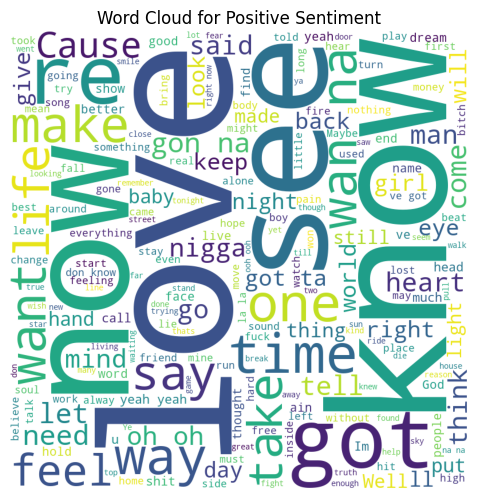

In [21]:
positive_sentiment_textblob = songs[songs['textblob_polarity'] > 0]['preproc_content'].str.cat(sep=' ')
generate_wordcloud(positive_sentiment_textblob, 'Word Cloud for Positive Sentiment')

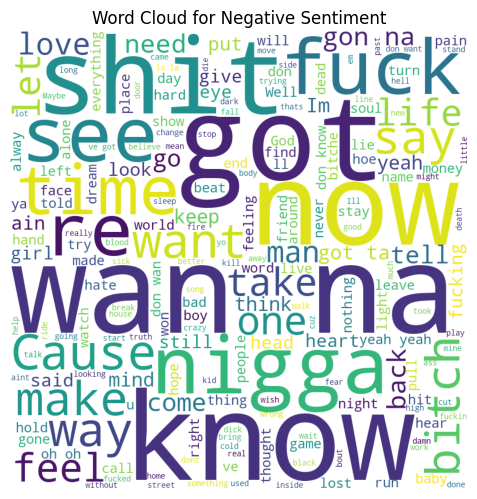

In [22]:
negative_sentiment_textblob = songs[songs['textblob_polarity'] < 0]['preproc_content'].str.cat(sep=' ')
generate_wordcloud(negative_sentiment_textblob, 'Word Cloud for Negative Sentiment')

>After preforming these tests and taking in account the way each NLP works we chose to use VADER in the rest of our work.

# 3. Extracting Insights  <a class="anchor" id="chapter3"></a>
---
In this section, since we have picked our sentiment analysis algorithm and have used it to obtain the needed scores, we will be extracting insights from the sentiments identified in our lyrics and other features present in the dataset.

## 3.1.  Predominant Sentiments in Lyrics per Genre <a class="anchor" id="section_3_1"></a>
We intend to answer the question **"What are the predominant sentiments in the lyrics of the songs of a specific musical genre?"**.

In [35]:
merged_scores_vader

,compound_score,negative_score,neutral_score,positive_score
tag,,,,
country,0.413600,0.087848,0.761238,0.150926
misc,0.296455,0.095747,0.775584,0.128672
pop,0.263679,0.102273,0.752189,0.145538
rap,-0.206184,0.147913,0.727873,0.124214
rb,0.389329,0.098645,0.738273,0.163083
rock,-0.009758,0.128745,0.746987,0.124267


> Country is the one with the highest compound score, meaning it's the most positive genre. <br>
Rap is identified as the most negative, with a compound of -0.206 and a negative score of 0.14. <br>
Interesting observation: even though the country is the genre with the highest average compound score, R&B as the biggest average positive compound score. This can be explained due to the way VADER works when analyzing the sentiment of a text using VADER, we receive an output with the compound score, the negative score, the positive score, and the neutral score, so maybe R&B songs have peaks of positiveness in their songs, but these are compensated by more negative parts of the lyrics while country music keep itself positive rarely featuring negative sentiments, this is proved when you look at the results of the negative compound score for country and R&B and see that this value is greater for R&B music. 

## 3.2. Sentiment Changes Over the Years  <a class="anchor" id="section_3_2"></a>

We want to answer the question **"Are there changes in the predominant sentiments of a genre over the years?"**

For better understanding, the best option is to do by decades, instead of year after year. The one per year was very confusing, this graph is much clearer.

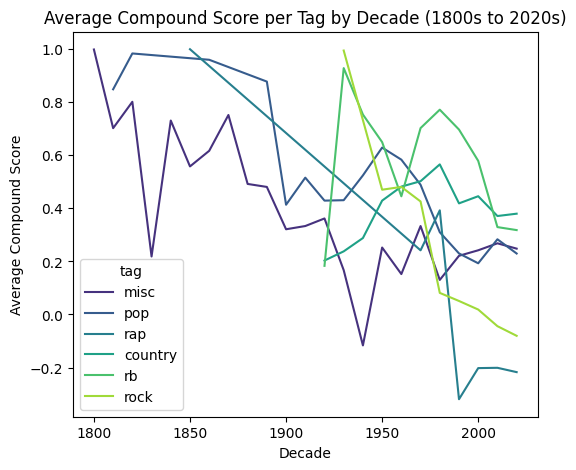

In [24]:
# Round the 'year' column to decades
songs['decade'] = (songs['year'] // 10) * 10

# Filter the dataset for years between 1800 and 2023
filtered_data = songs[(songs['year'] >= 1800) & (songs['year'] < 2024)]

# Calculate average compound score per decade and tag
average_compound_per_decade_tag = filtered_data.groupby(['decade', 'tag'])['compound_score_vader'].mean().reset_index()

# Plot the average compound score per tag for the decades
plt.figure(figsize=(6, 5))
sns.lineplot(x='decade', y='compound_score_vader', hue='tag', data=average_compound_per_decade_tag, palette = 'viridis')
plt.title('Average Compound Score per Tag by Decade (1800s to 2020s)')
plt.xlabel('Decade')
plt.ylabel('Average Compound Score')
plt.show()

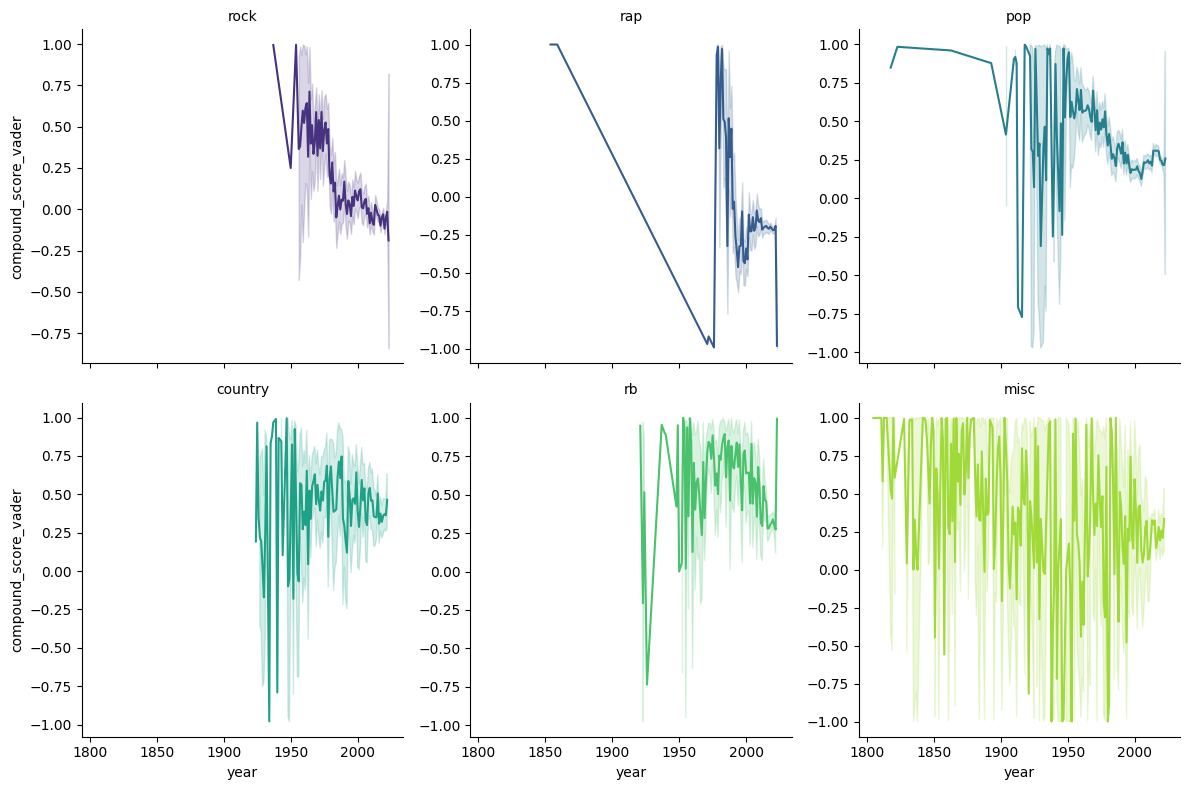

In [25]:
#Doing a graphic for each genre
g = sns.FacetGrid(filtered_data, col="tag", col_wrap=3, height=4, sharey=False, hue = 'tag', palette = 'viridis')
g.map(sns.lineplot, "year", "compound_score_vader")
g.set_titles(col_template="{col_name}")

# Show the plots
plt.show()

- Rock music used to have a pretty positive sentiment, but with time it got more and more negative.
- Rap also started quite positive, until the 90’s when the compound score dropped and it remained with a relatively negative sentiment until the actual days.
- Pop songs started quite inconsistent until the 50’s where it kept consistently positive, descending a bit.
- Country music also started quite inconsistent until the 50’s where it kept a consistent positive trend.
- Regarding rb, this genre kept pretty positive, almost never reaching the zero compound score mark.
- Misc was the most unpredictable genre during the years, it had very positive songs and very negative songs and never really having more negative and more positive years.


## 3.3. Sentiment and Songs' Popularity <a class="anchor" id="section_3_3"></a>

We aim to answer **"Does a song's sentiment impact its popularity within a genre (or even across genres)?"**.

In [26]:
# Checking for the maximum and minimum number of views in all songs
min_views = songs['views'].min()
print(min_views)

max_views = songs['views'].max()
print(max_views)

0
3604497


In [27]:
import math

In [28]:
# Create a new column 'log_views' in the 'songs' DataFrame, applying a lambda function to calculate the logarithm of 'views'
# Values are set to 0 if 'views' is 0 or negative, otherwise, the natural logarithm is rounded to two decimal places
songs['log_views'] = songs['views'].apply(lambda x: 0 if x == 0 else (0 if x < 0 else round(math.log(x), 2)))

#### Scatterplot - Compound Score and Views

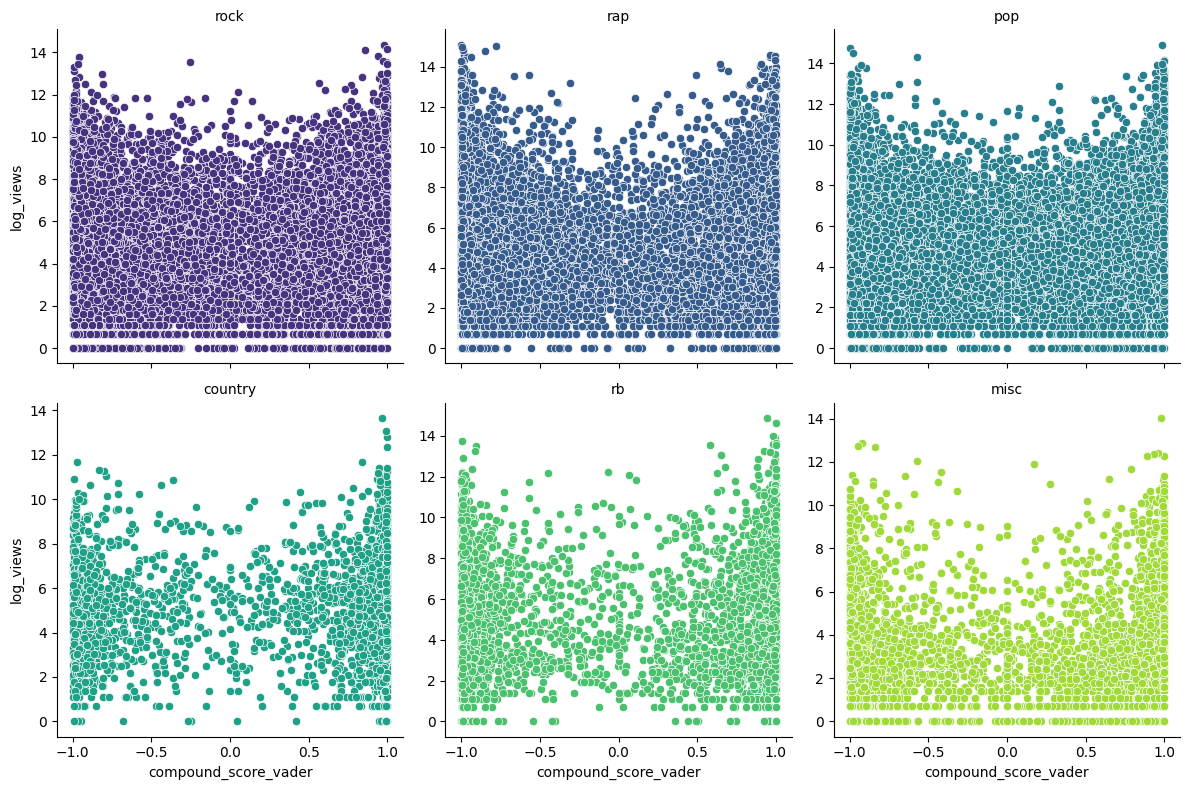

In [29]:
# Your existing code
g = sns.FacetGrid(songs, col="tag", col_wrap=3, height=4, sharey=False,  hue="tag", palette="viridis")
g.map(sns.scatterplot, "compound_score_vader", "log_views")
g.set_titles(col_template="{col_name}")

# Show the plots
plt.show()

>The scatter plot reveals a trend where songs with both the most negative and most positive sentiment scores also tend to garner higher numbers of views. This pattern appears consistent across all genres, suggesting a correlation between extreme sentiment and increased viewership.

## 3.4. Featuring and sentiment <a class="anchor" id="section_3_4"></a>
We intend to answer the question **"Does the inclusion of featuring relate to any sentiment? Are songs with a more negative tone more likely to include featuring?"**

In [30]:
# Group by 'featuring' and calculate mean compound score
sentiment_by_featuring = songs.groupby('featuring')['compound_score_vader'].mean()
print(sentiment_by_featuring)


featuring
0    0.105911
1    0.006299
Name: compound_score_vader, dtype: float64


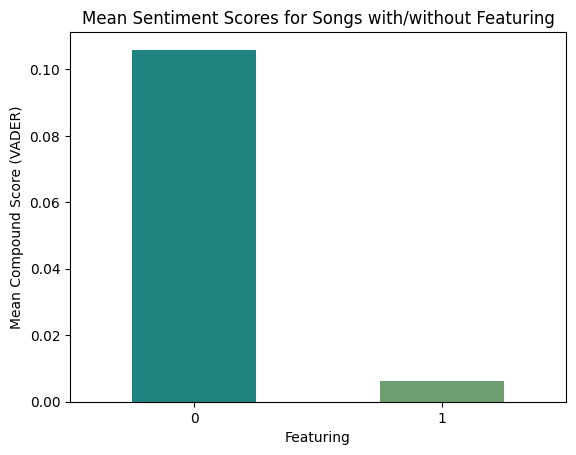

In [31]:
# Plot a bar chart for sentiment scores based on featuring using Matplotlib and Pandas
sentiment_by_featuring.plot(kind='bar', rot=0, color = ['#218380', '#6D9F71'])
plt.xlabel('Featuring')
plt.ylabel('Mean Compound Score (VADER)')
plt.title('Mean Sentiment Scores for Songs with/without Featuring')

# Display the plot
plt.show()


>The mean compound sentiment score for songs without featuring is approximately 0.106, while for songs with featuring, it's approximately 0.006. This suggests that, on average, songs without featuring tend to have a higher compound sentiment score (more positive sentiment) compared to songs with featuring, which exhibit a lower mean compound sentiment score (closer to neutral sentiment).

## 3.5. Lyrics' Complexity and Sentiment  <a class="anchor" id="section_3_5"></a>
We are interested in answering the question **"Is there a correlation between the complexity of lyrics (measured by vocabulary richness) and the expressed sentiment? Do more complex lyrics tend to convey more nuanced sentiments?"**.

In [32]:
# Function to calculate TTR (Type-Token Ratio)
def calculate_ttr(text):
    words = text.lower().split()  # Tokenize words
    unique_words = set(words)     # Get unique words
    ttr = len(unique_words) / len(words)
    return ttr

# Apply the TTR function to calculate vocabulary richness
songs['vocabulary_richness'] = songs['lyrics'].apply(calculate_ttr)


# Calculate Pearson correlation between 'vocabulary_richness' and 'compound_score_vader'
correlation = songs['vocabulary_richness'].corr(songs['compound_score_vader'])

print(f"Pearson Correlation between Vocabulary Richness and Compound Sentiment: {correlation}")


Pearson Correlation between Vocabulary Richness and Compound Sentiment: -0.10555096109241373


The Pearson correlation coefficient, which measures the linear relationship and strength of association between two variables, indicating the direction and magnitude of their linear dependence, between vocabulary richness and compound sentiment is approximately -0.106. This value suggests a weak negative correlation between the complexity of lyrics (measured by vocabulary richness) and the expressed compound sentiment.

>A weak negative correlation implies that, on average, as the vocabulary richness increases, there might be a slight tendency for the compound sentiment score to decrease slightly. However, the correlation is not strong, indicating that the relationship between vocabulary richness and sentiment is not highly pronounced.

In [33]:
# Calculate correlations for each tag separately
correlation_by_tag = songs.groupby('tag')[['vocabulary_richness', 'compound_score_vader']].corr().iloc[0::2, -1]

print(correlation_by_tag)


tag                         
country  vocabulary_richness   -0.057501
misc     vocabulary_richness   -0.104464
pop      vocabulary_richness   -0.118769
rap      vocabulary_richness   -0.039168
rb       vocabulary_richness   -0.063948
rock     vocabulary_richness   -0.122259
Name: compound_score_vader, dtype: float64



For each music genre (tag), here are the correlations between vocabulary richness and compound sentiment scores: <br>
- Country: Correlation: -0.058 <br>
- Miscellaneous: Correlation: -0.104 <br>
- Pop: Correlation: -0.119 <br>
- Rap: Correlation: -0.039 <br>
- R&B: Correlation: -0.064 <br>
- Rock: Correlation: -0.122
>These correlations indicate the relationship between vocabulary richness and compound sentiment scores within each music genre. While some genres show slightly stronger negative correlations (e.g., Pop and Rock), overall, the correlations remain weak, suggesting a minimal relationship between the complexity of lyrics and the expressed compound sentiment across these genres.